In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('For_EDA_dataset.csv')
print(df)

        Unnamed: 0 property_type     price             location       city  \
0                0          Flat  10000000                 G-10  Islamabad   
1                1          Flat   6900000                 E-11  Islamabad   
2                2         House  16500000                 G-15  Islamabad   
3                3         House  43500000            Bani Gala  Islamabad   
4                4         House   7000000          DHA Defence  Islamabad   
...            ...           ...       ...                  ...        ...   
153425      168441         House  26500000           Gadap Town    Karachi   
153426      168442         House  12500000           Gadap Town    Karachi   
153427      168443         House  27000000           Gadap Town    Karachi   
153428      168444         House  11000000           Gadap Town    Karachi   
153429      168445         House   9000000  Bahria Town Karachi    Karachi   

            province_name   latitude  longitude  baths   purpos

In [6]:
print(df.head())

   Unnamed: 0 property_type     price     location       city  \
0           0          Flat  10000000         G-10  Islamabad   
1           1          Flat   6900000         E-11  Islamabad   
2           2         House  16500000         G-15  Islamabad   
3           3         House  43500000    Bani Gala  Islamabad   
4           4         House   7000000  DHA Defence  Islamabad   

       province_name   latitude  longitude  baths   purpose  bedrooms  \
0  Islamabad Capital  33.679890  73.012640      2  For Sale         2   
1  Islamabad Capital  33.700993  72.971492      3  For Sale         3   
2  Islamabad Capital  33.631486  72.926559      6  For Sale         5   
3  Islamabad Capital  33.707573  73.151199      4  For Sale         4   
4  Islamabad Capital  33.492591  73.301339      3  For Sale         3   

   date_added         agency                                         agent  \
0  2019-02-04           Self                                          Self   
1  2019-05-04 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153430 entries, 0 to 153429
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     153430 non-null  int64  
 1   property_type  153430 non-null  object 
 2   price          153430 non-null  int64  
 3   location       153430 non-null  object 
 4   city           153430 non-null  object 
 5   province_name  153430 non-null  object 
 6   latitude       153430 non-null  float64
 7   longitude      153430 non-null  float64
 8   baths          153430 non-null  int64  
 9   purpose        153430 non-null  object 
 10  bedrooms       153430 non-null  int64  
 11  date_added     153430 non-null  object 
 12  agency         153430 non-null  object 
 13  agent          153430 non-null  object 
 14  Area_in_Marla  153430 non-null  float64
dtypes: float64(3), int64(4), object(8)
memory usage: 17.6+ MB
None


In [9]:
print(df.describe())

          Unnamed: 0         price       latitude      longitude  \
count  153430.000000  1.534300e+05  153430.000000  153430.000000   
mean    82557.398266  1.841821e+07      29.880767      71.262127   
std     48809.918320  3.624713e+07       3.804206       3.133135   
min         0.000000  0.000000e+00      11.052446      25.906027   
25%     40454.250000  2.000000e+05      24.943971      67.129162   
50%     81388.500000  8.700000e+06      31.461468      73.056182   
75%    124932.750000  2.000000e+07      33.562800      74.162285   
max    168445.000000  2.000000e+09      73.184088      80.161430   

               baths       bedrooms  Area_in_Marla  
count  153430.000000  153430.000000  153430.000000  
mean        2.955739       3.259408      12.333483  
std         2.494301       1.971117      94.629860  
min         0.000000       0.000000       0.000000  
25%         1.000000       2.000000       4.900000  
50%         3.000000       3.000000       7.600000  
75%         5.00

In [13]:
print(df.isnull().sum())

Unnamed: 0       0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area_in_Marla    0
dtype: int64


In [42]:
dup= df.duplicated().sum()
print("duplicates:",dup)

duplicates: 0


In [20]:
print(df.dtypes)

Unnamed: 0         int64
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area_in_Marla    float64
dtype: object


In [23]:
print(df.columns)

Index(['Unnamed: 0', 'property_type', 'price', 'location', 'city',
       'province_name', 'latitude', 'longitude', 'baths', 'purpose',
       'bedrooms', 'date_added', 'agency', 'agent', 'Area_in_Marla'],
      dtype='object')


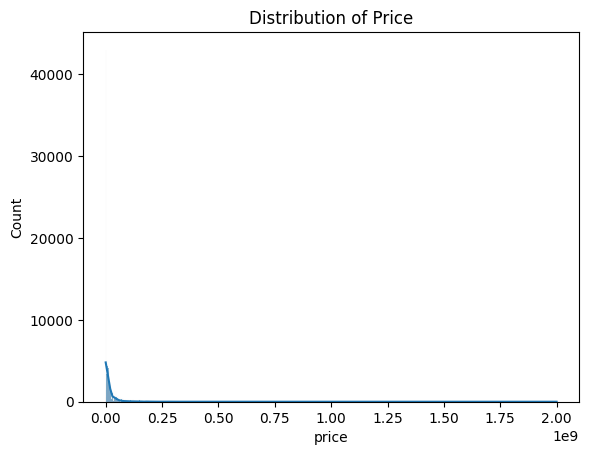

In [50]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

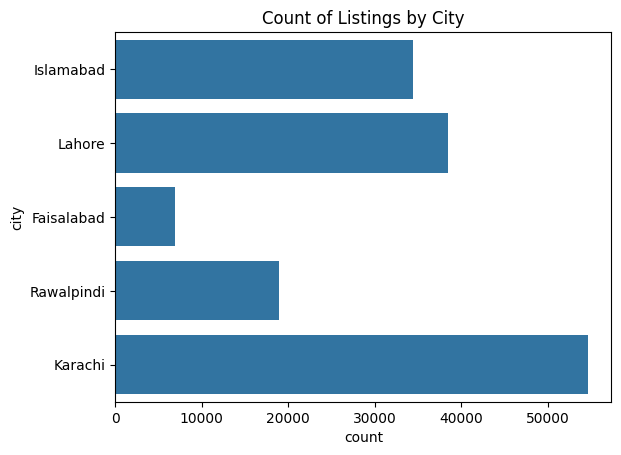

In [57]:
sns.countplot(y=df['city'])
plt.title('Count of Listings by City')
plt.show()

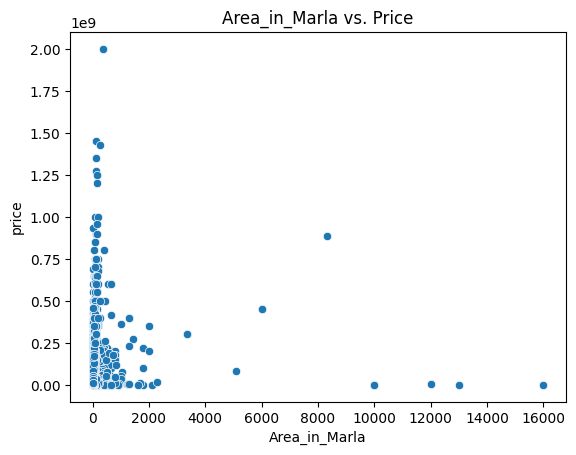

In [58]:
sns.scatterplot(x='Area_in_Marla', y='price', data=df)
plt.title('Area_in_Marla vs. Price')
plt.show()

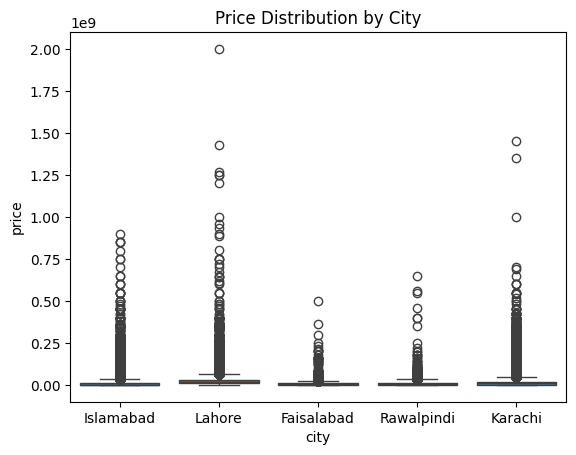

In [73]:
sns.boxplot(x='city', y='price', data=df)
plt.title('Price Distribution by City')
plt.show()

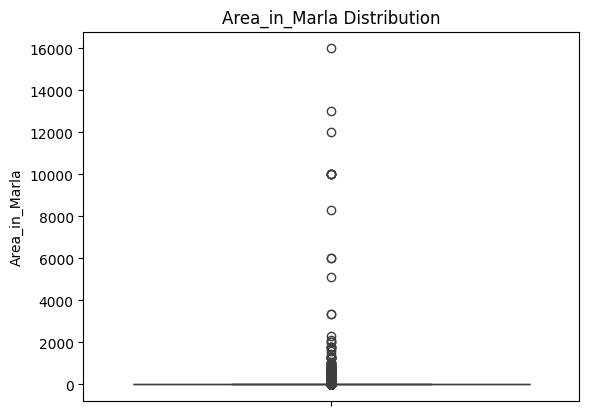

In [72]:
sns.boxplot(df['Area_in_Marla'])
plt.title('Area_in_Marla Distribution')
plt.show()

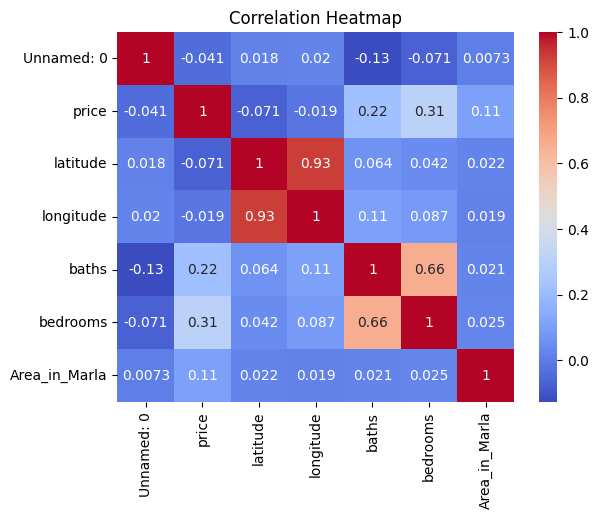

In [80]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [83]:
z_scores = np.abs(stats.zscore(df[['price', 'Area_in_Marla']].dropna()))
outliers = np.where(z_scores > 3)
print("Outliers detected at indices:", outliers)


Outliers detected at indices: (array([    12,     31,     34, ..., 153371, 153396, 153414], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


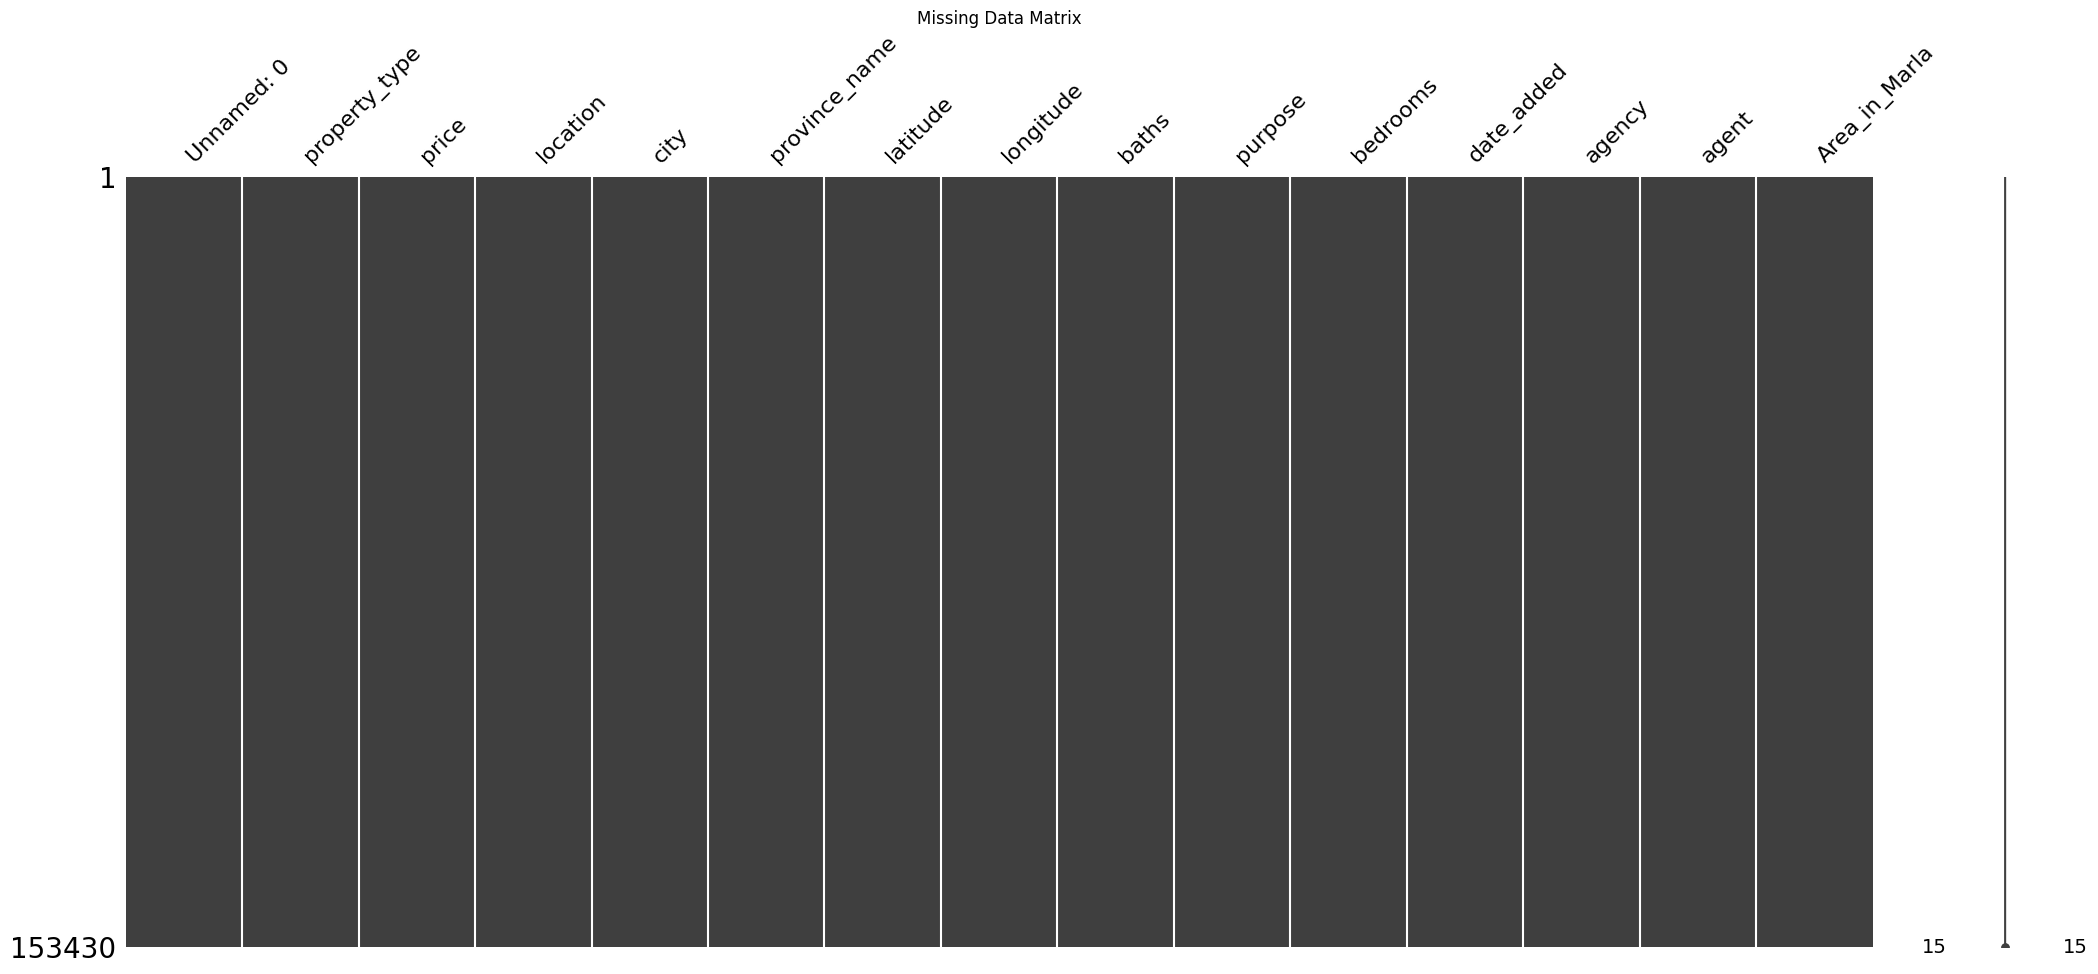

In [85]:
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()


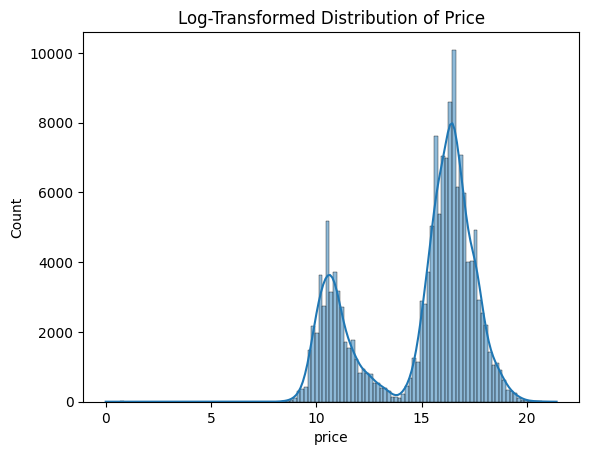

In [87]:
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Log-Transformed Distribution of Price')
plt.show()
